In [1]:
import numpy as np 
import matplotlib.pyplot as plt #import des packages

# Séance nº4 : description de données par quantiles ; modélisation d’une relation (corrélation) ; approche Monte-Carlo

## 1. Fin de l’exercice sur description et modélisation de données

### 1.1 *Albedo de la surface d’un glacier : distribution*

\* Synthèse de la distribution avec un graphe en ‘boîte à moustaches’ (‘*box and whiskers plot*’ ou simplement ‘*boxplot*’).

\* Distribution sur un axe en quantiles : ordonner les valeurs ; les représenter sur un graphe X-Y avec en X l’index normalisé (0-100%) de chaque valeur et en Y la valeur. Décrire la forme de cette distribution. Application : quelle proportion du glacier possède un albedo inférieur à 0.32 ?

## voir TP3

### 1.2 *Corrélation entre albedo et bilan de masse d’un glacier*


Le bilan de masse (gain ou perte nette de masse de l’ensemble du glacier) a aussi été mesuré. Le jeu de données (fichier ‘Donnees\_BM-Albedo\_Argentiere\_2000-2014.csv’) contient l’albedo moyen (minimum atteint en septembre) et le bilan de masse, pour 15 années.

In [2]:
[Years, SMB, Albedo_mean]=np.loadtxt('Donnees_BM-Albedo_Argentiere_2000-2014.csv',skiprows=1,unpack=True)
#import des données "unpack" permet de séparer nos données en 3 variables dans notre cas 

\* Réaliser un graphe de corrélation X-Y des données, bilan en fonction de l’albedo. Calculer le coefficient de
corrélation.

Text(0.5, 1.0, 'Relation Bilan masse - Albedo, Argentiere 2000-2014')

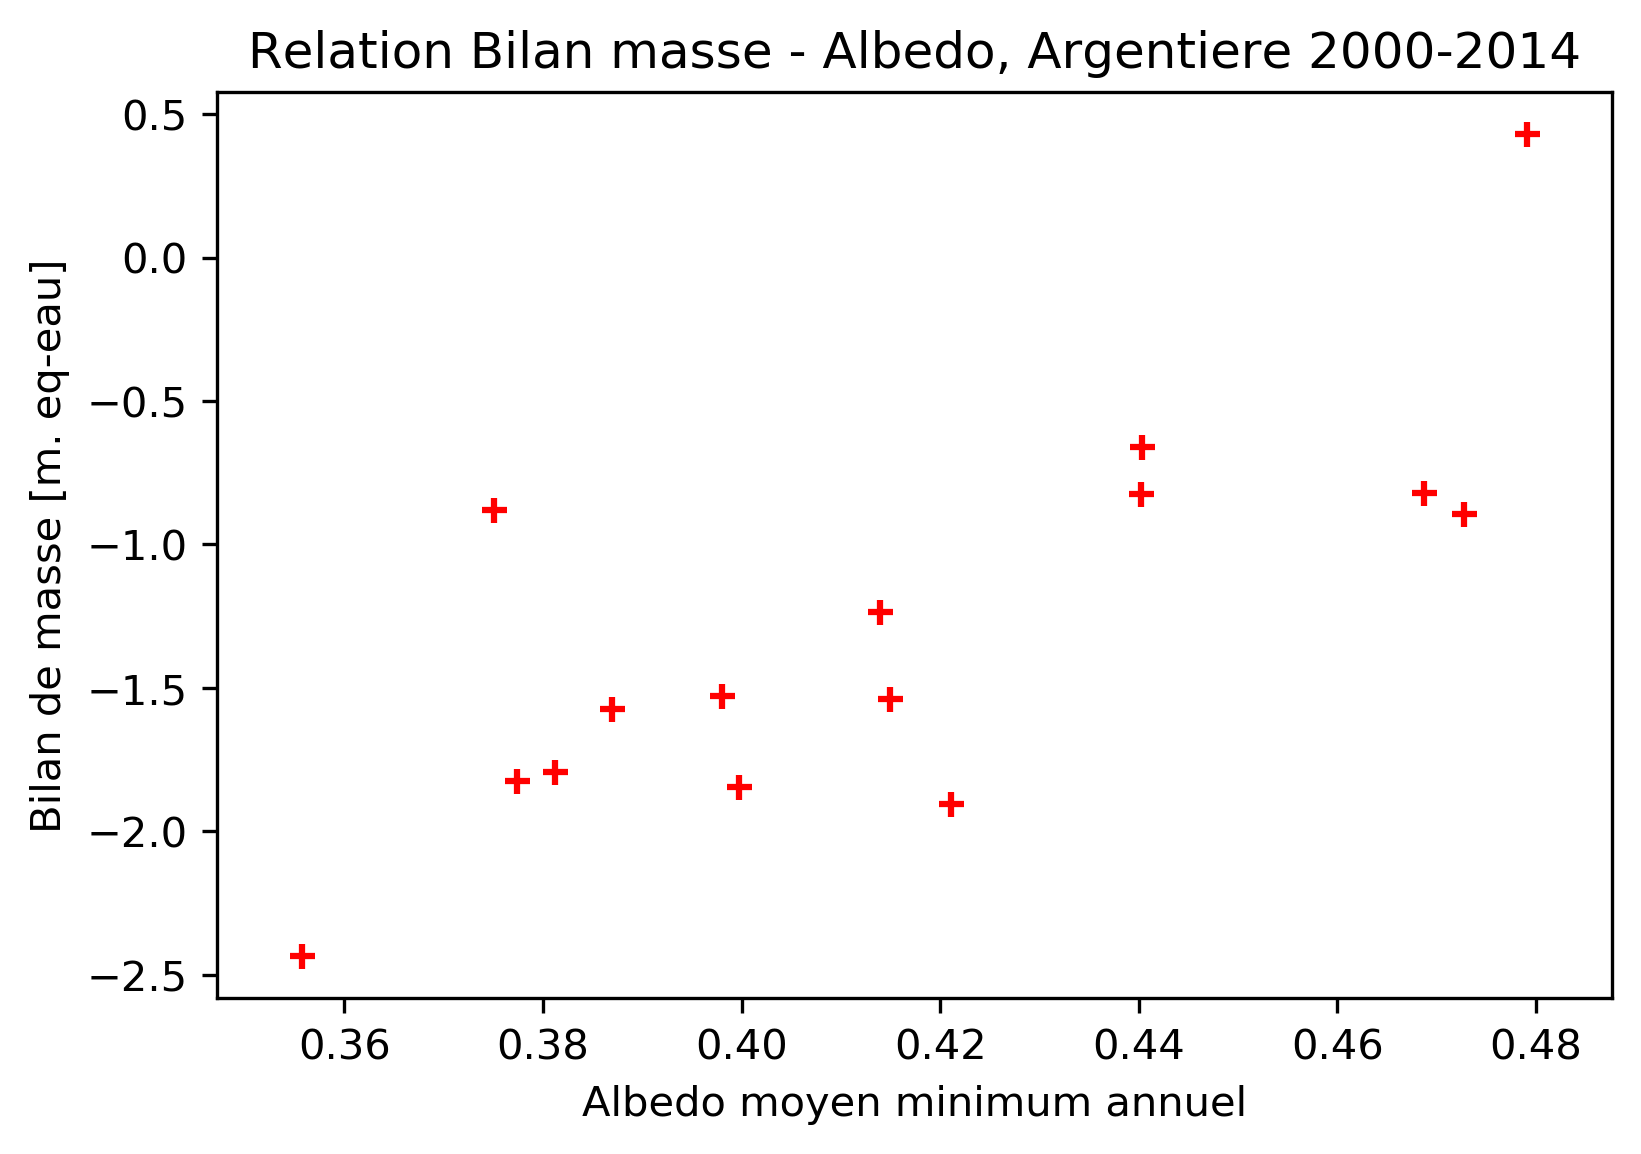

In [3]:
#figure de nos données de la manière la plus simple possible
plt.figure(4, dpi=300)
plt.scatter(Albedo_mean,SMB,color='red',marker='+')
plt.xlabel('Albedo moyen minimum annuel')
plt.ylabel('Bilan de masse [m. eq-eau]')
plt.title('Relation Bilan masse - Albedo, Argentiere 2000-2014')

In [4]:
mean_x=np.mean(Albedo_mean)
n=len(Albedo_mean)
Var_albedo=1/n*np.sum((Albedo_mean-mean_x)**2) #Variance albedo
std_x=np.sqrt(Var_albedo)#ecart type albedo

mean_y=np.mean(SMB)
Var_SMB=1/n*np.sum((SMB-mean_y)**2)#Variance Bilan de masse
std_y=np.sqrt(Var_SMB)#ecart type Bilan de masse

#coefficient de corrélation linéaire
r = 1./(std_x * std_y * n) * np.sum(  (Albedo_mean-mean_x) * (SMB-mean_y))
#coefficient de détermination (google it!!!)
r2 = r**2
print("r2=",r2)

r2= 0.6005553863846751


On utilise plutôt la valeur r2 (coefficent de détermination) pour caractériser la corrélation. Une valeur r2=0.6 est correcte pour des paramètres assez indépendants physiquement. Si vous souhaitez aller plus loin, des tests existent pour savoir, en fonction du nombre de points que vous avez, du r2 obtenu lors de la corrélation, et du risque que vous prenez, si le r2 est satisfaisant et si vos variables sont significativement corrélées. 

\* Quel modèle simple convient pour décrire la relation entre ces deux paramètres ? Calculer pente et intercept du modèle linéaire de régression, ainsi que leur incertitude.

Les points sont un peu dispersés mais s’organisent quand même bien selon une direction. On cherche un modèle simple pour ajuster ce nuage de points (la relation entre alb et bm), on parle aussi de régression des points. Le modèle le plus simple, qui semble correct, est une droite : bm = a*alb+b.

Text(0.5, 1.0, 'Relation Bilan masse - Albedo, Argentiere 2000-2014')

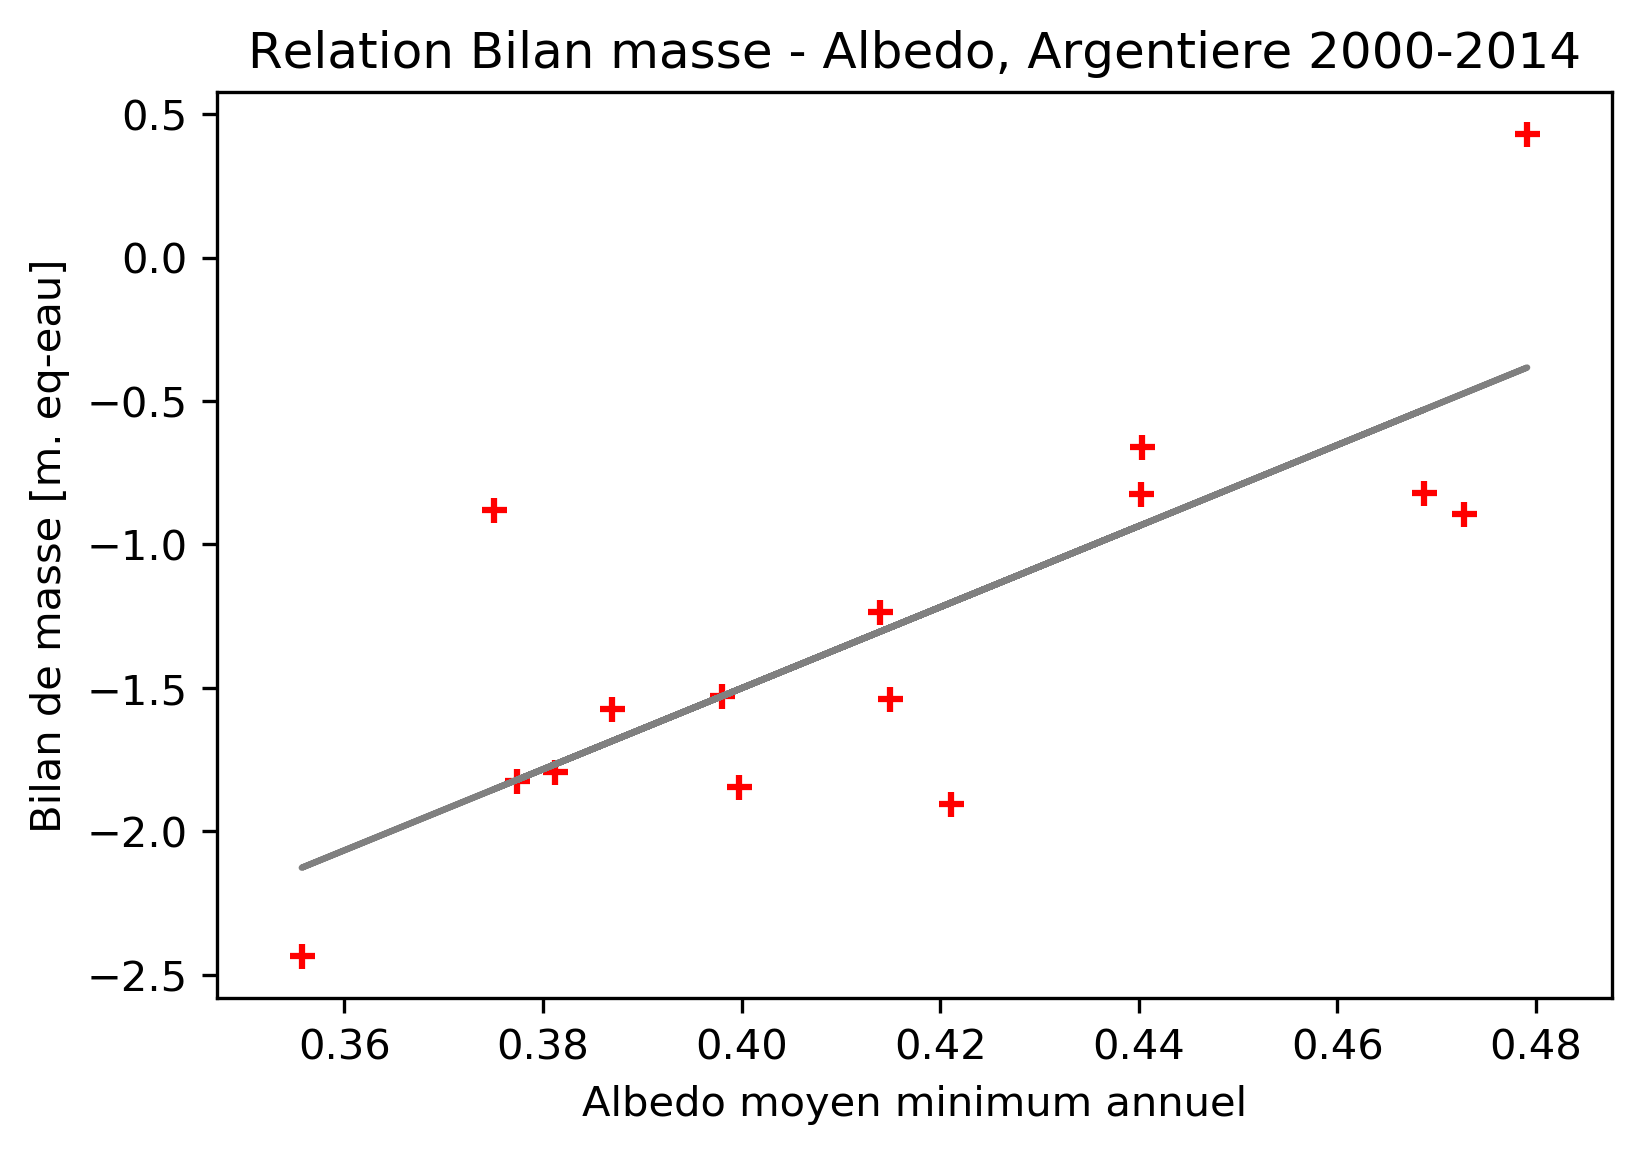

In [5]:
# Puis, on peut estimer, a et b, respectivement la pente et l'intercept de la droite de régression 
#ayant pour équation bm = a*alb+b.

a = r * std_y / std_x #calcul de a. la pente de notre regression linéaire
b = np.mean(SMB) - a * np.mean(Albedo_mean) #calcul de b. l'intercept ou l'ordonnée à l'origine de notre régression 

sse = np.sum( (SMB - (a * Albedo_mean + b))**2 )#somme au carré des erreurs par rapport au données mesurées
std_e = np.sqrt(( 1./ (n - 2)) * sse ) 
std_a = std_e / (np.sqrt(n) * std_x) # Ecart-type sur la pente = 3.2
std_b = std_a * np.sqrt((1./n) * np.sum(Albedo_mean**2)) # Ecart-type sur l'intercept = 1.3


# Puis on trace cette droite

regression = a*Albedo_mean + b # Ici on recalcule les valeurs de bilan si elles étaient toutes sur la droite 
#(cela nous permet en fait de tracer cette droite de correlation.)

plt.figure(5, dpi=300)
plt.scatter(Albedo_mean,SMB,color='red',marker='+')
plt.plot(Albedo_mean, regression,color = 'grey')
plt.xlabel('Albedo moyen minimum annuel')
plt.ylabel('Bilan de masse [m. eq-eau]')
plt.title('Relation Bilan masse - Albedo, Argentiere 2000-2014')
#plt.savefig('BM_albedo_linear_reg.pdf')


\* Estimation des incertitudes du modèle linéaire par approche Monte-Carlo : ce modèle est appliqué sur 3000
échantillons des données (technique 'Bootstrap'). Ré-échantillonner les couples de valeurs albedo - bilan de
masse 3000 fois (avec remise). Pour chaque échantillon (parmi les 3000) de 15 couples de valeurs, calculer
pente et intercept de la régression linéaire. Calculer enfin moyenne et écart type de ces deux paramètres.
Comparer avec les statistiques obtenues ci-dessus sous hypothèse de distribution normale.

In [6]:
alea=np.random.randint(0,len(SMB)-1,size=(15,3000))# je crée une matrice de 15 par 3000 contenant des valeurs 
#aléatoires comprises entre 0 et 14. 

bilan=SMB[alea] #je crée un matrice de même taille que "alea" mais contenant les valeurs de SMB correspondant
# à la valeur de alea. 
albedo_m=Albedo_mean[alea] #idem pour albedo



---------
Rappels de cours : métriques de corrélation par méthode quadratique (‘moindres carrés’)

Pour deux séries x et y de *n* éléments, de moyennes $\bar{x}$ et $\bar{y}$, on peut calculer les coefficients suivants :

les variances $$Var_x=\frac{1}{n} \cdot \sum_1^n(x-\bar{x})^2 $$  $$Var_y=\frac{1}{n} \cdot \sum_1^n(y-\bar{y})^2$$,

les écarts types $ \sigma_x=\sqrt{Var_x}$ et $\sigma_y=\sqrt{Var_y} $,

la covariance $$Cov_{xy}=\frac{1}{n}\sum_1^n(x-\bar{x})\cdot(y-\bar{y})$$,

le coefficient de corrélation est alors  $r=\frac{Cov_{xy}}{\sigma_x\sigma_y}$.

-------

Approche 1 : on ne connaît pas l’incertitude de mesure (ou cette incertitude est très faible par rapport à la dispersion des points)

La régression linéaire est obtenue en minimisant la somme des distances quadratiques (SSE = *Sum of squared errors*) entre chaque point et la droite de régression d’équation y = ax + b : $$SSE=\sum_1^n(y-(ax+b))^2 $$. On peut alors déterminer analytiquement a et b comme : a = *r*. σ<sub>y</sub>/σ<sub>x</sub> et $b = \bar{y} - a.\bar{x}$.

On suppose que les séries x et y ont des moyennes qui vérifient effectivement $\bar{y}(x) = ax+b$, et que chaque valeur y est distribuée normalement autour de $\bar{y}(x)$, avec un écart type σ<sub>e</sub>. Un bon estimateur de σ<sub>e</sub> est alors : $$\sigma_e=\sqrt{\frac{1}{n-2}\cdot\sum_1^n(y-(ax+b))^2} $$.

Les incertitudes sur *a* et *b* peuvent être estimées par leur écart type : $$\sigma_a=\frac{\sigma_e}{\sqrt{n}\cdot\sigma_x}$$ et $$\sigma_b=\frac{\sigma_e}{\sqrt{n}\cdot\sigma_x}\cdot\sqrt{\frac{1}{n}\cdot\sum_1^nx^2}$$

 Intervalles de confiance :

De façon standard on définit les intervalles de confiance au niveau *p* (par exemple *p*=95%) avec la distribution de Student et le coefficient t<sub>n-2,(1-p)/2</sub> (n-2 degrés de liberté) c’est à dire la valeur de t qui laisse α = (1‑p)/2 probabilité résiduelle.

L’intervalle de confiance sur a est ±σ<sub>a</sub>.t<sub>n-2,α</sub> et sur b ±σ<sub>b</sub>.t<sub>n-2,α</sub> .

L’intervalle de confiance sur la droite de régression (c’est à dire sur la valeur moyenne y(x) ) est : 

$$y(x)\pm \sigma_e\cdot t_{n-2,\alpha}\sqrt{\frac{1}{n}+\frac{(x-\bar{x})^2}{\sum_1^n(x-\bar{x})^2}}=y(x)\pm \sigma_e\cdot t_{n-2,\alpha}\sqrt{\frac{1}{n}+\frac{(x-\bar{x})^2}{n\cdot\sigma_x^2}}$$

L’intervalle de confiance sur la distribution des valeurs y(x) autour de leur moyenne y(x) est : $$y(x)\pm \sigma_e\cdot t_{n-2,\alpha}\sqrt{1+\frac{1}{n}+\frac{(x-\bar{x})^2}{n\cdot\sigma_x^2}}$$

Illustration (tirée de von Storch & Zwiers 1999) : ![figure1](figureTP4_1.png)

(intervalles de confiance à 95% de la pente (2 courbes rapprochées) et de la distribution des valeurs autour de la droite de régression)

Approche 2 : on connaît les incertitudes de mesures (et elles sont conséquentes par rapport à la dispersion des points autour de la droite de régression)

La régression linéaire est obtenue en minimisant la somme des distances quadratiques, pondérées par 1/σ, (SSE = *Sum of squared errors*) entre chaque point et la droite de régression d’équation y = ax + b :
$$SSE=\sum_1^n\frac{(y_i-a.x_i+b))^2}{\sigma_i}$$
Dans le cas où l’incertitude de mesure (σ) est la même pour toutes les valeurs, on obtient alors les écarts types sur pente et intercept comme :
$$\sigma_a^2=\frac{n.\sigma^2}{n.\sum_1^nx^2-(\sum_1^nx)^2}$$

et 
$$\sigma_b^2=\frac{\sigma^2\sum_1^nx^2}{n.\sum_1^nx^2-(\sum_1^nx)^2}$$.

## 2. Introduction à l’intégration numérique

 Il est courant en géosciences de faire face à une intégrale qu’il est impossible de calculer analytiquement. C’est souvent pour une des deux raisons suivantes :

on connaît l’équation différentielle qui décrit le phénomène (lois physiques), mais pas sa primitive ;

on connaît le phénomène par des mesures de terrain, et on a besoin d’intégrer l’un des paramètres dans le temps ou l’espace (intégration d’un débit ou des précipitations, par exemple).

 Pour intégrer numériquement une équation différentielle, ou des données, on a besoin des valeurs pour des pas de temps ou d’espace ‘discrets’. Entre ces pas, les valeurs exactes de ces paramètres ne sont pas connues, et des hypothèses sur ces valeurs manquantes sont nécessaires. Cette discrétisation, inhérente à l’approche numérique, introduit une erreur sur le résultat de l’intégration. Pour réduire cette erreur, il faut d’une part réduire la taille des pas (mais au détriment du coût de calcul), d’autre part utiliser des hypothèses sur les valeurs manquantes plus ‘réalistes’ (ce qu’on appelle des schémas numériques).

### 2. 1 *Le schéma d’intégration : la méthode des trapèzes*

 Soit une fonction *f*(x), que l’on veut intégrer sur l’intervalle \[x<sub>0</sub>,x<sub>N</sub>\]. Cet intervalle est discrétisé en N intervalles égaux de longueur ∆x. La méthode d’intégration des trapèzes consiste à approcher l’intégrale de la fonction *f* sur chaque intervalle \[x<sub>i\\ </sub>, x<sub>i+1</sub>\] = ∆x par l’aire d’un trapèze :

$\int_{x_i}^{x_{i+1}}f(x) dx \approx \frac{\Delta x (f(x_i)+f(x_{i+1}))}{2} $(1)

Cette formule (1) est le résultat de l’intégration du développement limité d’ordre 1 de *f*(x), dont le résultat exact est :

$\int_{x_i}^{x_{i+1}}f(x) dx=\frac{\Delta x (f(x_i)+f(x_{i+1}))}{2} +O(\Delta x^3 f'')$ (2)

Le second terme du second membre de l’équation (2) quantifie l’erreur commise sur l’intégrale de *f* approchée par la méthode des trapèzes. En choisissant ce schéma, l’ordre de grandeur de l’erreur est quantifié par la valeur faisant intervenir la valeur du pas d’intégration ∆x ainsi que la dérivée seconde de la fonction *f*. (La valeur de l’erreur est fondamentale quand on cherche à faire des calculs précis et justes.)

L’interprétation “graphique” du schéma numérique est donnée sur la figure. On comprend alors que plus le pas d’intégration ∆x est petit et plus on se rapproche d’un calcul précis pour la valeur finale de l’intégrale.
![figure2](figureTP4_2.png)
Figure : a) Fonction f(x) à intégrer sur l’intervalle d’intégration \[x<sub>0</sub>,x<sub>N</sub>\] , discrétisé en (N+1) points équidistants. Les figures b) et c) illustrent le schéma numérique. L’intégrale entre deux points x<sub>i</sub> et x<sub>i+1</sub> de f(x) est approchée en calcul numérique soit par b) l’aire du trapèze x<sub>i</sub> x<sub>i+1</sub> f<sub>i+1</sub> f<sub>i</sub> , soit par c) l’aire du rectangle de base x<sub>i</sub> et x<sub>i+1</sub> et de hauteur (f<sub>i</sub> + f<sub>i+1</sub> )/2.

Soit une fonction *f* que l’on veut intégrer sur un intervalle \[x<sub>0</sub>,x<sub>N</sub>\] par la méthode des trapèzes.

#### a) Ecrire la relation entre ∆x et N (le nombre d’intervalles).

#### b) Montrer que l’aire du trapèze et l’aire du rectangle des figures b et c sont les mêmes.

#### c) Ecrire la relation (1) sur tout l’intervalle \[x<sub>0</sub>,x<sub>N</sub>\], en fonction des f(x<sub>i</sub>), i∈\[0,N\].